In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('../5_Supervised_Learning/datasets/decision_tree_datasets/kyphosis.csv')

In [30]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [32]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [33]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

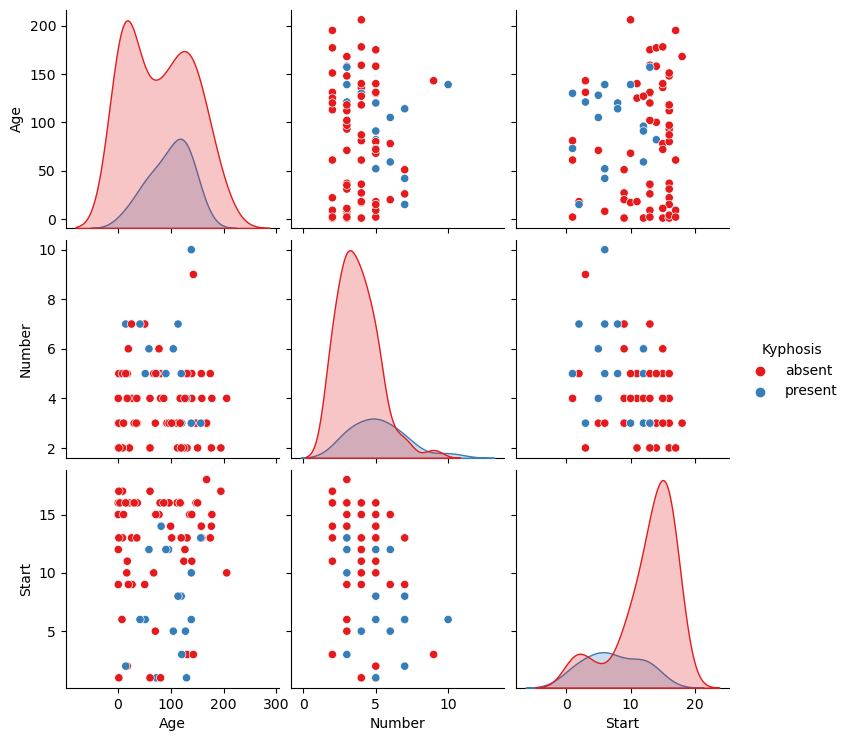

In [34]:
sns.pairplot(data,hue = 'Kyphosis',palette = 'Set1' )

In [43]:
X = data[['Age','Number','Start']]
# X = data.drop('Kyphosis',axis = 1)
y = data['Kyphosis']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 3), (17, 3), (64,), (17,))

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model = DecisionTreeClassifier()

In [50]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'present', 'present'], dtype=object)

In [53]:
y_test

22    present
27     absent
61    present
13     absent
71     absent
74     absent
30     absent
55     absent
53     absent
26     absent
50     absent
42     absent
48    present
33     absent
73     absent
2     present
57    present
Name: Kyphosis, dtype: object

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

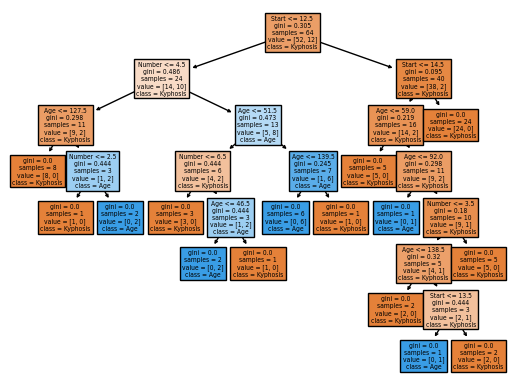

In [58]:
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Kyphosis', 'Age','Number','Start'])
plt.show()

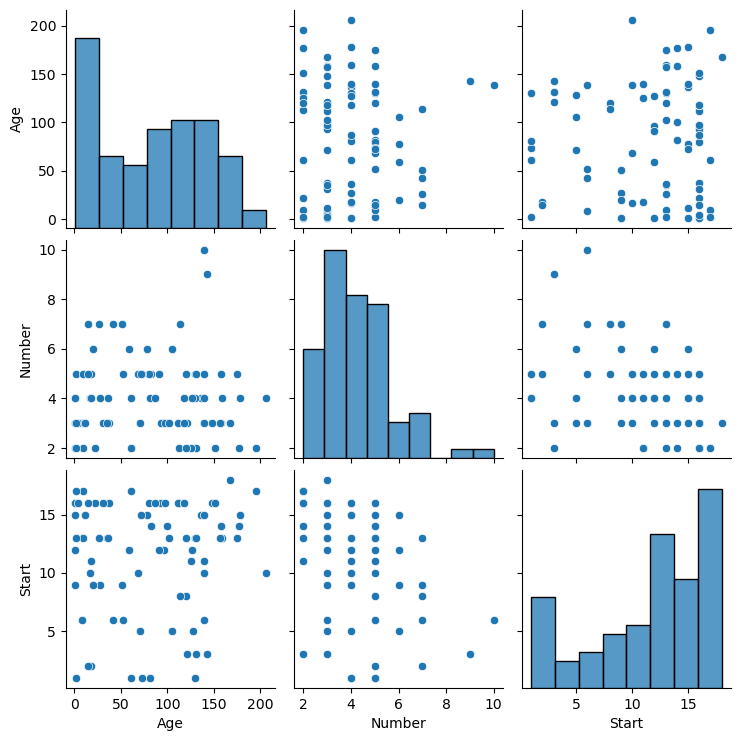

In [59]:
sns.pairplot(data)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.83      0.83      0.83        12
     present       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17



In [73]:
print(confusion_matrix(y_test,y_pred))

[[10  2]
 [ 2  3]]


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(n_estimators = 100)

In [86]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
rfc_pred = rfc.predict(X_test)

In [88]:
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'absent'], dtype=object)

In [91]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.73      0.92      0.81        12
     present       0.50      0.20      0.29         5

    accuracy                           0.71        17
   macro avg       0.62      0.56      0.55        17
weighted avg       0.66      0.71      0.66        17



In [92]:
print(confusion_matrix(y_test,rfc_pred))

[[11  1]
 [ 4  1]]
